## Seguimiento 2
### Caterine Bedoya - Jhonatan Jurado

#### 1. Se implementa el juego de la vida con dos especies A y B

In [1]:
import numpy as np
import random

def new_board(x, y, num_live_cells_A=3, num_dead_cells=2,num_live_cells_B=2):
    """Initializes a board for Conway's Game of Life"""
    board = []
    for i in range(0, y):
        # Defaults to a 3:2 dead cell:live cell ratio
        board.append([random.choice([0] * num_dead_cells +  [1] * num_live_cells_A + [2] * num_live_cells_B) for _ in range(0, x)]) #+[0] * num_dead_cells
    return board

#+  [1] * num_live_cells
def get(board, x, y):
    """Return the value at location (x, y) on a board, wrapping around if out-of-bounds"""
    return board[y % len(board)][x % len(board[0])]


def assign(board, x, y, value):
    """Assigns a value at location (x, y) on a board, wrapping around if out-of-bounds"""
    board[y % len(board)][x % len(board[0])] = value


def count_neighbors(board, x, y):
    """Counts the number of living neighbors a cell at (x, y) on a board has"""

    sumaA=0
    sumaB=0

    neighbors=[
        get(board, x - 1, y),
        get(board, x + 1, y),
        get(board, x, y - 1),
        get(board, x, y + 1),
        get(board, x + 1, y + 1),
        get(board, x + 1, y - 1),
        get(board, x - 1, y + 1),
        get(board, x - 1, y - 1)]

    for i in neighbors:
      if i==1:
        sumaA+=1
      elif i==2:
        sumaB+=1

    return int(sumaA), int(sumaB)


def process_life(board):
    """Creates the next iteration from a passed state of Conway's Game of Life"""
    next_board = new_board(len(board[0]), len(board))
    #print(board)
    for y in range(0, len(board)):
        for x in range(0, len(board[y])):
            num_neighborsA, num_neighborsB = count_neighbors(board, x, y)
            #print(num_neighborsA, num_neighborsB)
            is_aliveA = get(board, x, y) == 1
            is_aliveB = get(board, x, y) == 2

            if is_aliveA:
              if num_neighborsA < 2 or num_neighborsA > 3 or num_neighborsB > 2:
                assign(next_board, x, y, 0)
              elif 2 <= num_neighborsA <= 3 and num_neighborsB <= 2:
                assign(next_board, x, y, 1)

            if is_aliveB:
              if num_neighborsB < 2 or num_neighborsB > 3 or num_neighborsA > 2:
                assign(next_board, x, y, 0)
              elif 2 <= num_neighborsB <= 3 and num_neighborsA <= 2:
                assign(next_board, x, y, 2)

            if not is_aliveA and not is_aliveB:
              if num_neighborsB == 3 and num_neighborsA <= 2:
                assign(next_board, x, y, 2)
              elif num_neighborsA == 3 and num_neighborsB <= 2:
                assign(next_board, x, y, 1)

            else:
              assign(next_board, x, y, 0)

    return next_board

def count(board):

  count_A=0
  count_B=0
  for y in range(0, len(board)):
    for x in range(0, len(board[y])):
      is_aliveA = get(board, x, y) == 1
      is_aliveB = get(board, x, y) == 2
      if is_aliveA:
        count_A+=1
      elif is_aliveB:
        count_B+=1
  return count_A, count_B

In [2]:
from IPython.display import clear_output
import time

def draw_board(board):
    res = ''
    for row in board:
        for col in row:
            if col == 1:
              res += '★ '
            elif col ==2:
              res += 'o '
            else:
                res += '  '
        res += '\n'
    return res

board = new_board(50, 50)

NUM_ITERATIONS = 1000

total_counts_A=[]
total_counts_B=[]

for i in range(0, NUM_ITERATIONS):
    print('Iteration ' + str(i + 1))
    board= process_life(board)
    count_A, count_B= count(board)
    total_counts_A.append(count_A)
    total_counts_B.append(count_B)
    res = draw_board(board)
    print(res)
    time.sleep(0.1)
    clear_output(wait=True)

Iteration 1000
    ★ ★ ★   ★ ★       ★             ★       ★ ★     ★   o   ★               ★ ★         ★ o ★   o o 
  ★ ★   ★ ★ ★       o ★     ★     ★ ★ o ★       ★   o         ★ o       o   ★ o o ★         ★   ★   
      ★       ★             o o   o o ★ ★     ★ o ★     ★   ★ ★ ★   ★   ★     o ★       ★ o         
      ★   ★       ★ ★   o     ★       ★     ★ ★     ★       ★   o   o ★ ★   ★           ★   ★       
  ★   ★     o o ★   ★     o   ★ ★ ★     o     ★ o         ★ ★ o                     ★ ★   ★   o   ★ 
        ★     ★       o ★     ★       o   o     ★ ★ o ★ ★     o ★ ★         o   ★     ★ ★ ★     ★   
o     o         ★ ★ o   o       o o ★         ★   o   ★   ★     ★   o ★ o           ★ o             
★ ★       o           ★   o         ★         o     ★   ★     ★ ★                 ★     ★   ★ o   ★ 
  ★ ★ ★   ★     ★   o     ★ ★   ★ o     o   ★ ★   o         ★ ★   o   o o ★ ★ o   ★ ★ ★   ★         
    ★ ★   ★       o o o     ★       ★   o ★     ★   ★   o   ★       o   o o 

#### 2. Se modifica la condición de nacimiento, esto es, si $x_{ij}==0$ y $NA_v==5$ y $NB_v<2$ entonces $x_{ij}==1$

In [3]:
def process_life_modified(board):
    """Creates the next iteration from a passed state of Conway's Game of Life"""
    next_board = new_board(len(board[0]), len(board))
    #print(board)
    for y in range(0, len(board)):
        for x in range(0, len(board[y])):
            num_neighborsA, num_neighborsB = count_neighbors(board, x, y)
            #print(num_neighborsA, num_neighborsB)
            is_aliveA = get(board, x, y) == 1
            is_aliveB = get(board, x, y) == 2

            if is_aliveA:
              if num_neighborsA < 2 or num_neighborsA > 3 or num_neighborsB > 2:
                assign(next_board, x, y, 0)
              elif 2 <= num_neighborsA <= 3 and num_neighborsB <= 2:
                assign(next_board, x, y, 1)

            if is_aliveB:
              if num_neighborsB < 2 or num_neighborsB > 3 or num_neighborsA > 2:
                assign(next_board, x, y, 0)
              elif 2 <= num_neighborsB <= 3 and num_neighborsA <= 2:
                assign(next_board, x, y, 2)

            if not is_aliveA and not is_aliveB:
              if num_neighborsB == 5 and num_neighborsA <= 2:
                assign(next_board, x, y, 2)
              elif num_neighborsA == 3 and num_neighborsB <= 2:
                assign(next_board, x, y, 1)

            else:
              assign(next_board, x, y, 0)

    return next_board

total_counts_A_mod=[]
total_counts_B_mod=[]

for i in range(0, NUM_ITERATIONS):
    print('Iteration ' + str(i + 1))
    board_mod= process_life_modified(board)
    count_A_mod, count_B_mod= count(board_mod)
    total_counts_A_mod.append(count_A_mod)
    total_counts_B_mod.append(count_B_mod)
    res_mod = draw_board(board_mod)
    print(res_mod)
    time.sleep(0.1)
    clear_output(wait=True)

Iteration 1000
★ ★             ★ o ★     o ★   o ★   ★   o     ★ ★       o   ★ ★   ★     ★       ★   o       ★     
o     ★           o     ★ o   o           ★ ★ ★   ★     ★ ★       ★ o     ★           o o o   ★   ★ 
    ★   ★ o ★     ★ ★ o ★ o     ★         ★ ★       ★ o   ★       o       ★ o     ★ o ★     ★ ★   ★ 
★ ★     o   ★ ★ ★         ★     o   ★   ★ o     ★     ★ ★ ★   o   ★       ★   o     o ★   ★   ★ ★ ★ 
    ★     ★           ★ o   ★       ★ ★   ★ ★     ★ ★ ★ ★         ★ ★ o o o ★   ★ ★     o   ★   o   
o ★ ★ o   ★ ★     o ★       o   ★ ★ ★       ★ ★             ★       o ★ ★ o   ★   ★ ★         o     
  o ★   ★   o ★               o         ★ o o   ★   o   ★   ★ o   ★       ★ ★   o ★       o ★ o   ★ 
    o         o ★ ★ ★           o ★   ★ ★ ★ ★   ★ ★   ★   ★       ★   o   o o o ★     ★   ★         
o       ★   o     ★   ★ o     ★       o   o     o   ★ ★ o ★     ★   ★                   o   ★ ★ o ★ 
  o           ★ ★       ★ ★   ★ ★             ★       o   ★   ★ ★ ★   o     

#### 3. Histograma de células A y B para el histórico de 1000 iteraciones

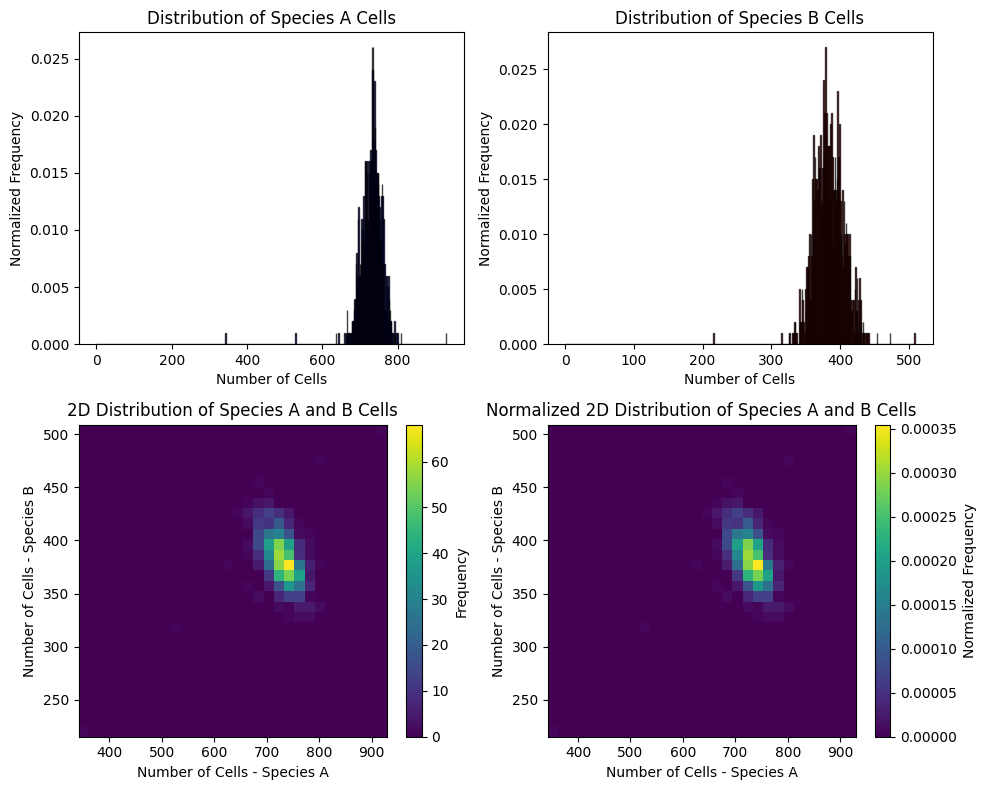

In [22]:
# Plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 8)) #,sharey=True
ax[0,0].hist(total_counts_A, bins=range(max(total_counts_A)+1), density=True, alpha=0.75, color='blue', label='Species A', width=1, ec='k')
ax[0,0].set_title('Distribution of Species A Cells')
ax[0,0].set_xlabel('Number of Cells')
ax[0,0].set_ylabel('Normalized Frequency')

ax[0,1].hist(total_counts_B, bins=range(max(total_counts_B)+1), density=True, alpha=0.75, color='red', label='Species B', width=1, ec='k')
ax[0,1].set_title('Distribution of Species B Cells')
ax[0,1].set_xlabel('Number of Cells')
ax[0,1].set_ylabel('Normalized Frequency')

hist, x_edges, y_edges,img = ax[1,0].hist2d(total_counts_A, total_counts_B, bins=30, cmap='viridis')
cbar = fig.colorbar(img)
ax[1,0].set_xlabel('Number of Cells - Species A')
ax[1,0].set_ylabel('Number of Cells - Species B')
ax[1,0].set_title('2D Distribution of Species A and B Cells')
#ax[1,0].colorbar(label='Normalized Frequency')
cbar.set_label('Frequency')

hist, x_edges, y_edges,img = ax[1,1].hist2d(total_counts_A, total_counts_B, bins=30, cmap='viridis', density=True)
cbar = fig.colorbar(img)
ax[1,1].set_xlabel('Number of Cells - Species A')
ax[1,1].set_ylabel('Number of Cells - Species B')
ax[1,1].set_title('Normalized 2D Distribution of Species A and B Cells')
#ax[1,0].colorbar(label='Normalized Frequency')
cbar.set_label('Normalized Frequency')

plt.tight_layout()
plt.show()

#### 5. Se implementa el algoritmo de Metrópolis para generar una serie de estados del sistema.

In [25]:
# función de probabilidad

def probabilidad(x, y):
    x_i = 0
    y_i = 0
    for i in range(len(x_edges)):
        if x_edges[i] < x < x_edges[i + 1]:
            x_i = i
            break
    for j in range(len(y_edges)):
        if y_edges[j] < y < y_edges[j + 1]:
            y_i = j
            break

    return hist[x_i][y_i]

probabilidad(700,400)


0.00019817126169036534

In [26]:
# algoritmo de metropolis

phi_0 = (max(x_edges)*np.random.random(),max(y_edges)*np.random.random())

phi = [phi_0]

while len(phi )< 1000:
  phi_p = (max(x_edges)*np.random.random(),max(y_edges)*np.random.random())
  d_S = -np.log(probabilidad(phi_p[0],phi_p[1])/probabilidad(phi[-1][0],phi[-1][1]))

  if d_S < 0:
    phi.append(phi_p)

  elif d_S > 0:
    x = np.random.random()

    if x < probabilidad(phi_p[0],phi_p[1])/probabilidad(phi[-1][0],phi[-1][1]):
      phi.append(phi_p)

    elif x > probabilidad(phi_p[0],phi_p[1])/probabilidad(phi_0[0],phi_0[1]):
      pass

C:\Users\Hogar\AppData\Local\Temp\ipykernel_8292\122763304.py:9: RuntimeWarning: invalid value encountered in scalar divide
  d_S = -np.log(probabilidad(phi_p[0],phi_p[1])/probabilidad(phi[-1][0],phi[-1][1]))
C:\Users\Hogar\AppData\Local\Temp\ipykernel_8292\122763304.py:9: RuntimeWarning: divide by zero encountered in scalar divide
  d_S = -np.log(probabilidad(phi_p[0],phi_p[1])/probabilidad(phi[-1][0],phi[-1][1]))
C:\Users\Hogar\AppData\Local\Temp\ipykernel_8292\122763304.py:9: RuntimeWarning: divide by zero encountered in log
  d_S = -np.log(probabilidad(phi_p[0],phi_p[1])/probabilidad(phi[-1][0],phi[-1][1]))
C:\Users\Hogar\AppData\Local\Temp\ipykernel_8292\122763304.py:20: RuntimeWarning: invalid value encountered in scalar divide
  elif x > probabilidad(phi_p[0],phi_p[1])/probabilidad(phi_0[0],phi_0[1]):
C:\Users\Hogar\AppData\Local\Temp\ipykernel_8292\122763304.py:20: RuntimeWarning: divide by zero encountered in scalar divide
  elif x > probabilidad(phi_p[0],phi_p[1])/probabilida

#### 6. Probabilidad 2-dimensional de los estados generados con el algoritmo de Metrópolis

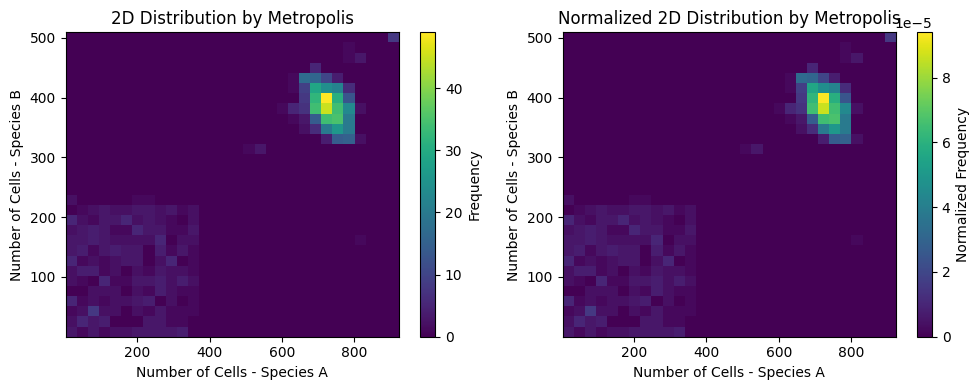

In [40]:
counts_A = []
counts_B = []
for i in range(len(phi)):
    counts_A.append(phi[i][0])
    counts_B.append(phi[i][1])

fig, ax = plt.subplots(1, 2, figsize=(10, 4)) #,sharey=True
hist, x_edges, y_edges,img = ax[0].hist2d(counts_A, counts_B, bins=30, cmap='viridis')
cbar = fig.colorbar(img)
ax[0].set_xlabel('Number of Cells - Species A')
ax[0].set_ylabel('Number of Cells - Species B')
ax[0].set_title('2D Distribution by Metropolis')
#ax[1,0].colorbar(label='Normalized Frequency')
cbar.set_label('Frequency')

hist, x_edges, y_edges,img = ax[1].hist2d(counts_A, counts_B, bins=30, cmap='viridis', density=True)
cbar = fig.colorbar(img)
ax[1].set_xlabel('Number of Cells - Species A')
ax[1].set_ylabel('Number of Cells - Species B')
ax[1].set_title('Normalized 2D Distribution by Metropolis')
#ax[1,0].colorbar(label='Normalized Frequency')
cbar.set_label('Normalized Frequency')

plt.tight_layout()
plt.show()

Puede notarse que la distribución de frecuencias absolutas obtenidas para la muestra estimada por metrópolis es similar a la del punto 3, por otro lado el histograma 2-dimensional de las densidades de probabilidad tiende cualitativamente a mostrar similitudes, sin embargo, se aprecicia un orden de magnitud de diferencia en las densidades con respecto a lo obtenido en el punto 3.